* Student name: Natalia Edelson
* Student pace: Flex
* Scheduled project review date/time: June 28, 2022
* Instructor name: Morgan Jones
* Blog post URL: https://medium.com/@nataliagoncharov/setting-up-microsoft-studios-for-success-9b352ad2b1e2

# 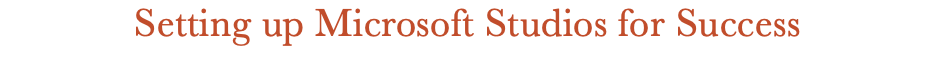

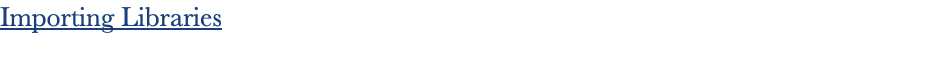

In [22]:
import sqlite3 # sql
import pandas as pd # dataframe
import seaborn as sns #visual
import numpy as np #number calc.
import plotly.express as px
import matplotlib.pyplot as plt  #visual
%matplotlib inline
import textwrap

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # word cloud 

conn = sqlite3.Connection("im.db") # sql

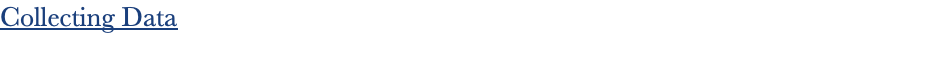

###### I fetch relevant data using SQL. Joining three tables: Principals, MovieBasics and Movie Ratings. 

In [23]:
main_table_im_a = """

SELECT *
FROM persons 

;
"""
main_table_im_a = pd.read_sql(main_table_im_a, conn)

main_table_im_a.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [24]:
# Check the size of the data. From the 3 tables we are getting around 60 thousand rows and 5 columns. 
main_table_im_a.shape

(606648, 5)

In [25]:
# Join table using Inner Join

main_table_im = """

SELECT p.person_id, p.primary_name AS name, p.primary_profession AS profession, pr.movie_id,
       m.primary_title, m.runtime_minutes, m.genres, mr.averagerating
FROM persons p
    INNER JOIN principals pr
        ON pr.person_id = p.person_id 
    INNER JOIN movie_basics m 
        ON m.movie_id = pr.movie_id
    INNER JOIN movie_ratings mr
        ON m.movie_id = mr.movie_id

;
"""
main_table_im = pd.read_sql(main_table_im, conn)

main_table_im.head()

,person_id,name,profession,movie_id,primary_title,runtime_minutes,genres,averagerating
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt0433397,Satin,84.0,"Comedy,Drama,Music",4.7
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt1681372,Caesar and Otto's Deadly Xmas,83.0,"Comedy,Horror",4.0
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt2281215,Elf-Man,86.0,"Comedy,Family,Fantasy",3.6
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt2387710,Journey to the Forbidden Valley,96.0,"Action,Adventure,Family",5.4


In [26]:
main_table_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629598 entries, 0 to 629597
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   person_id        629598 non-null  object 
 1   name             629598 non-null  object 
 2   profession       606622 non-null  object 
 3   movie_id         629598 non-null  object 
 4   primary_title    629598 non-null  object 
 5   runtime_minutes  567677 non-null  float64
 6   genres           624458 non-null  object 
 7   averagerating    629598 non-null  float64
dtypes: float64(2), object(6)
memory usage: 38.4+ MB


##### I load the other relevant data: Movie Gross and Movie Budget. I join the three data frames to create one master data frame which will allow me to examine multiple variables.

In [27]:
df_gross = pd.read_csv('bom.movie_gross.csv')
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [28]:
# Rename column form 'primary_title' to 'title'
main_table_im = main_table_im.rename(columns = {'primary_title' : 'title'})

In [29]:
# Merge databases
movie_data = main_table_im.merge(df_gross, how = 'inner', on ='title')

In [30]:
# Check the size of the data
movie_data.shape

(29385, 12)

#### I use inner join to join the three data frames. It joins only when it sees the match and then drops the rest. 
#### I am left with a little over 13,000 rows and 17 columns.

In [31]:
# Load the data with the gross and budget numbers. 
df_budget = pd.read_csv('tn.movie_budgets.csv', parse_dates=['release_date'])
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [32]:
# Rename column form 'movie' to 'title'
df_budget = df_budget.rename(columns = {'movie' : 'title'})

In [33]:
# Merge the dataframes
movie_data= movie_data.merge(df_budget, how = 'inner', on ='title')

##### I load the data with the gross and budget numbers. I use inner join to join the three data frames. It joins only when it sees the match and then drops the rest. I am left with a little over 13,000 rows and 17 columns. 

In [34]:
# Check the size of the data
movie_data.shape

(13690, 17)

In [35]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 0 to 13689
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   person_id          13690 non-null  object        
 1   name               13690 non-null  object        
 2   profession         13641 non-null  object        
 3   movie_id           13690 non-null  object        
 4   title              13690 non-null  object        
 5   runtime_minutes    13454 non-null  float64       
 6   genres             13640 non-null  object        
 7   averagerating      13690 non-null  float64       
 8   studio             13690 non-null  object        
 9   domestic_gross_x   13680 non-null  float64       
 10  foreign_gross      11757 non-null  object        
 11  year               13690 non-null  int64         
 12  id                 13690 non-null  int64         
 13  release_date       13690 non-null  datetime64[ns]
 14  produc

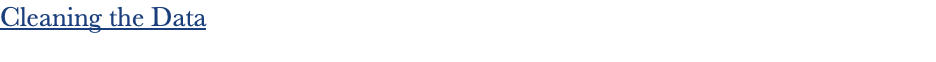

In [36]:
movie_data.head()

,person_id,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,152200000,2017,5,2017-04-07,"$60,000,000","$45,020,282","$197,578,586"
1,nm0038432,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,152200000,2017,5,2017-04-07,"$60,000,000","$45,020,282","$197,578,586"
2,nm0449549,Jordan Kerner,"producer,actor,executive",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,152200000,2017,5,2017-04-07,"$60,000,000","$45,020,282","$197,578,586"
3,nm0962596,Pamela Ribon,"writer,producer,actress",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,152200000,2017,5,2017-04-07,"$60,000,000","$45,020,282","$197,578,586"
4,nm0678963,Peyo,"writer,director,music_department",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,152200000,2017,5,2017-04-07,"$60,000,000","$45,020,282","$197,578,586"


##### I check the Null values in the data. Foreign_gross column has 1,933 null values. I will narrow my focus analyzing gross domestic and therefore can drop the ‘Forign_gorss’ all at ones. I drop the rows of the 'Null’ values since there are not that many of them and they won’t impact our data. 

In [37]:
movie_data.isnull().sum()

person_id               0
name                    0
profession             49
movie_id                0
title                   0
runtime_minutes       236
genres                 50
averagerating           0
studio                  0
domestic_gross_x       10
foreign_gross        1933
year                    0
id                      0
release_date            0
production_budget       0
domestic_gross_y        0
worldwide_gross         0
dtype: int64

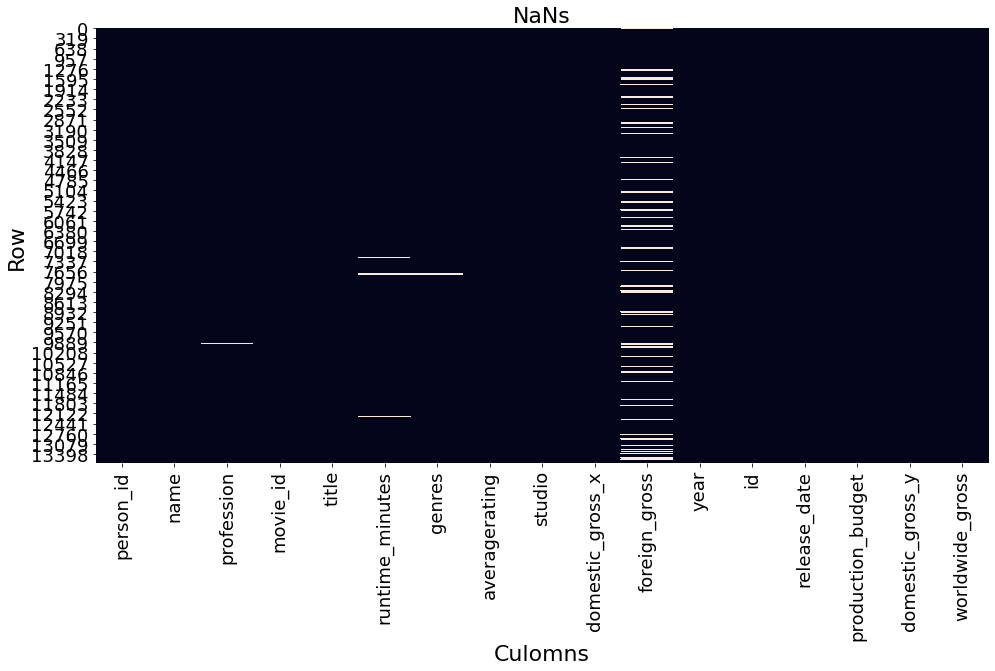

In [38]:
# Visualize the Null values using heatmap to get a better sense on the overall data.
fig, ax = plt.subplots(figsize=(16,8))

sns.heatmap(movie_data.isnull(), cbar=False)


plt.title("NaNs",fontsize=22)
plt.xlabel('Culomns',fontsize=22)
plt.ylabel('Row',fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

In [40]:
# Drop the rows where Null is present
movie_data = movie_data.dropna(subset=['profession', 'runtime_minutes', 'genres',
                                       'studio', 'domestic_gross_x'])

In [42]:
# Drop the following columns - since I will not be using them in my analysis. 
movie_data.drop(['foreign_gross', 'domestic_gross_y', 'person_id', 'id'], axis=1, 
                inplace = True)

In [43]:
# Check Null again
movie_data.isnull().sum()

name                 0
profession           0
movie_id             0
title                0
runtime_minutes      0
genres               0
averagerating        0
studio               0
domestic_gross_x     0
year                 0
release_date         0
production_budget    0
worldwide_gross      0
dtype: int64

##### I look closely into the stats to determine whether there are any outliers and understand the range of statistics. As of now, there are no outliers or place holders. 

In [44]:
movie_data.describe()

,runtime_minutes,averagerating,domestic_gross_x,year
count,13376.000000,13376.000000,1.337600e+04,13376.000000
mean,107.994916,6.433411,6.092523e+07,2013.726525
std,19.055024,1.006946,8.536596e+07,2.522269
min,3.000000,1.600000,8.000000e+02,2010.000000
25%,95.000000,5.900000,7.500000e+06,2011.000000
50%,105.000000,6.500000,3.370000e+07,2014.000000
75%,118.000000,7.100000,7.390000e+07,2016.000000
max,192.000000,9.200000,7.001000e+08,2018.000000


In [45]:
# Rename a column
movie_data.rename(columns ={'domestic_gross_x': "domestic_gross"}, inplace= True)

In [46]:
# Drop duplicates
movie_data=movie_data.drop_duplicates()

In [47]:
movie_data.drop_duplicates(inplace =True)

movie_data.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,2017,2017-04-07,"$60,000,000","$197,578,586"
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,2017,2017-04-07,"$60,000,000","$197,578,586"
2,Jordan Kerner,"producer,actor,executive",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,2017,2017-04-07,"$60,000,000","$197,578,586"
3,Pamela Ribon,"writer,producer,actress",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,2017,2017-04-07,"$60,000,000","$197,578,586"
4,Peyo,"writer,director,music_department",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45000000.0,2017,2017-04-07,"$60,000,000","$197,578,586"


#### Production budget’s data type shows as “object”. We need to clean the symbols that might be causing it. Cleaning budgets - removing ','and extra space. 


In [48]:

movie_data['production_budget'] = movie_data['production_budget'].str.replace(r'$', '')


<ipython-input-48-0e1252c2209e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movie_data['production_budget'] = movie_data['production_budget'].str.replace(r'$', '')


In [49]:
movie_data['production_budget'] = movie_data['production_budget'].str.replace(r',' , '')

In [50]:
movie_data['production_budget'] = movie_data['production_budget'].astype(int)

In [51]:
# Check data type is correct
movie_data.dtypes

name                         object
profession                   object
movie_id                     object
title                        object
runtime_minutes             float64
genres                       object
averagerating               float64
studio                       object
domestic_gross              float64
year                          int64
release_date         datetime64[ns]
production_budget             int64
worldwide_gross              object
dtype: object

In [52]:
# Convert the units to $Million.
movie_data['domestic_gross'] =  movie_data['domestic_gross']/1000000
movie_data['domestic_gross']

0        45.0
1        45.0
2        45.0
3        45.0
4        45.0
         ... 
13685    20.2
13686    20.2
13687    20.2
13688    20.2
13689    20.2
Name: domestic_gross, Length: 13376, dtype: float64

In [53]:
# Convert the units to $MM.
movie_data['production_budget'] = movie_data['production_budget']/1000000
movie_data['production_budget']

0        60.0
1        60.0
2        60.0
3        60.0
4        60.0
         ... 
13685    30.0
13686    30.0
13687    30.0
13688    30.0
13689    30.0
Name: production_budget, Length: 13376, dtype: float64

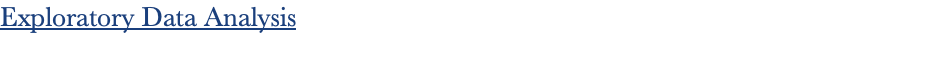

##### I plot histogram using Seaborn to visualize the distribution for domestic gross.

Text(0.5, 1.0, 'Domestic Gross in $MM Histogram: mean =61, Standard_Div. = 85')

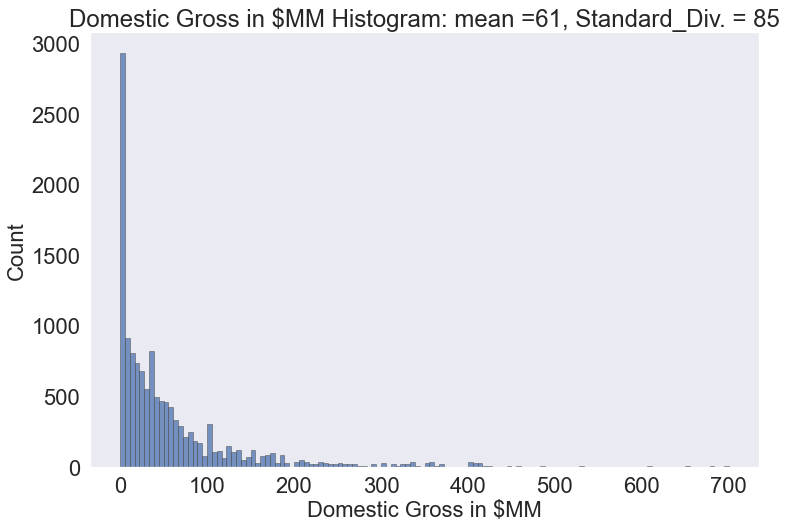

In [56]:
sns.set(font_scale=2)

mean = movie_data['domestic_gross'].mean()

SD = movie_data['domestic_gross'].std()

num_bin =50

plt.figure(figsize=(12,8))
sns.histplot(movie_data, x=movie_data['domestic_gross'], palette="light:m_r",edgecolor=".3",
linewidth=.5,)
plt.xlabel('Domestic Gross in $MM', fontsize=22)
plt.ylabel('Count', fontsize=22)

plt.grid()
plt.title('Domestic Gross in $MM Histogram: mean =' + str(round(mean)) +', Standard_Div. = '+ str(round(SD)))

##### The distribution is skewed to the left, where the mean is 60 million dollars , the 25 percentile is $7 million, the median is 33 million dollars, and the 75 percentile is 74 million dollars. The maximum is 700 million dollars. The majority of the data of gross domestic lies in the range of 10 million dollars to 70 million dollars.

In [57]:
movie_data['domestic_gross'].describe()

count    13376.00000
mean        60.92523
std         85.36596
min          0.00080
25%          7.50000
50%         33.70000
75%         73.90000
max        700.10000
Name: domestic_gross, dtype: float64

In [58]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13376 entries, 0 to 13689
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13376 non-null  object        
 1   profession         13376 non-null  object        
 2   movie_id           13376 non-null  object        
 3   title              13376 non-null  object        
 4   runtime_minutes    13376 non-null  float64       
 5   genres             13376 non-null  object        
 6   averagerating      13376 non-null  float64       
 7   studio             13376 non-null  object        
 8   domestic_gross     13376 non-null  float64       
 9   year               13376 non-null  int64         
 10  release_date       13376 non-null  datetime64[ns]
 11  production_budget  13376 non-null  float64       
 12  worldwide_gross    13376 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory 

In [59]:
movie_data.shape

(13376, 13)

In [60]:
movie_data.head(5)

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586"
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586"
2,Jordan Kerner,"producer,actor,executive",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586"
3,Pamela Ribon,"writer,producer,actress",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586"
4,Peyo,"writer,director,music_department",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586"


#### years

###### I plot the data looking at each year. The data is largely distributed uniformly. 

Text(0, 0.5, 'Count')

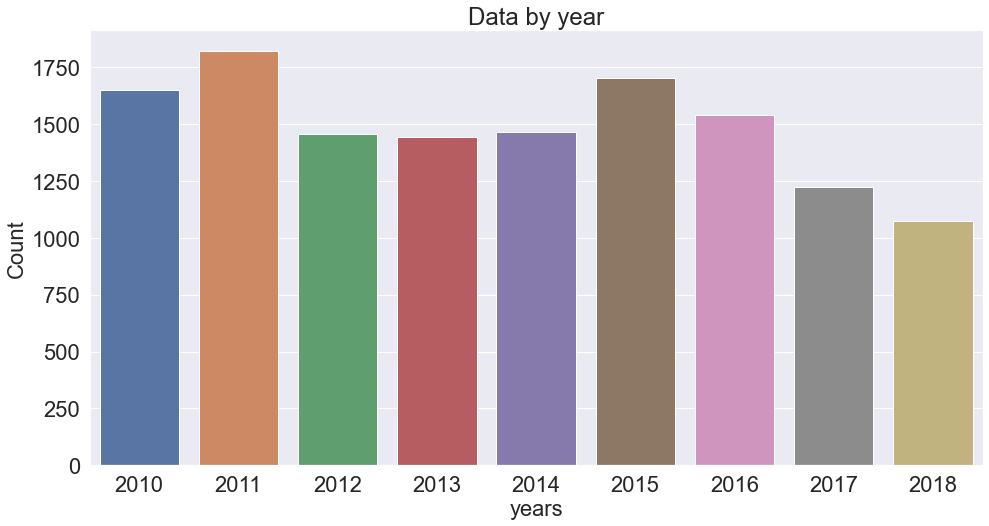

In [61]:
# Use seaborn to plot the years with pastel colors. 
sns.set_style('whitegrid')
sns.set_color_codes("pastel")
sns.set(font_scale=2)

plt.figure(figsize=(16, 8))
ax = sns.countplot(x="year", data=movie_data)
plt.title("Data by year")
plt.xlabel('years', fontsize=22)
plt.ylabel('Count', fontsize=22)

### Correlation

#### I am looking into the correlation of the different variables to determine strong relationships to domestic gross. I will examine closely the variables that show strong correlation. 

##### I plot the correlation using Seaborn heatmap to examine any relationships of the variables in our movies data. 

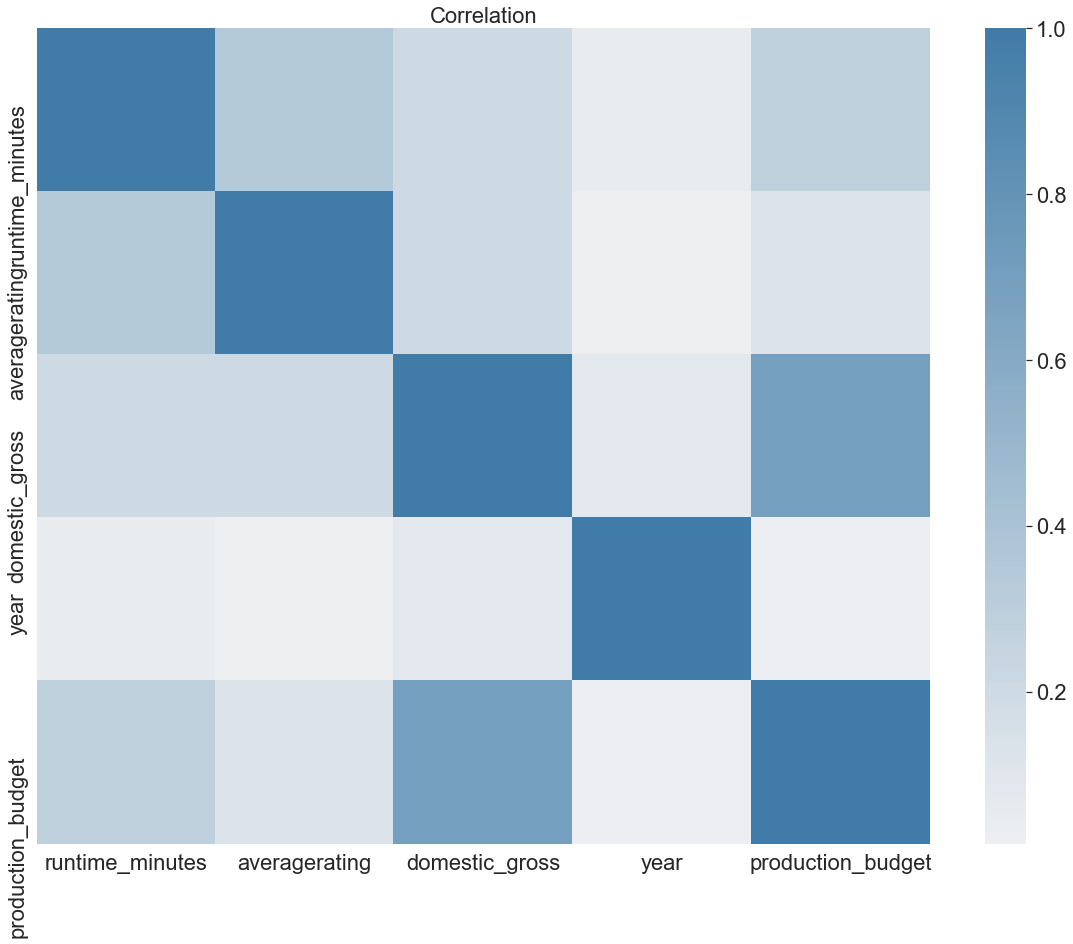

In [62]:
# Corr represents the correlation data. The darker the blue hue color the higher 
# the correlation.  

corr = movie_data.corr()

fig, ax = plt.subplots(figsize=(20,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240,240, as_cmap=True)
sns.heatmap(corr, center=0, cmap=cmap, robust=True)
plt.title('Correlation', fontsize=22);
sns.set(font_scale=1.4)


In [63]:
# Sum up the correlations that are higher than 0.65. Production Budget and 
# Domestic Gross show a higher correlation. 
(abs(movie_data.corr()) > 0.65).sum()

runtime_minutes      1
averagerating        1
domestic_gross       2
year                 1
production_budget    2
dtype: int64

In [64]:
# Correlation table gives us a precise number which supports the heatmap.

corrTable = movie_data.corr()
corrTable=round(corrTable,2)
corrTable

,runtime_minutes,averagerating,domestic_gross,year,production_budget
runtime_minutes,1.00,0.34,0.21,0.05,0.28
averagerating,0.34,1.00,0.21,0.02,0.13
domestic_gross,0.21,0.21,1.00,0.08,0.70
year,0.05,0.02,0.08,1.00,0.02
production_budget,0.28,0.13,0.70,0.02,1.00


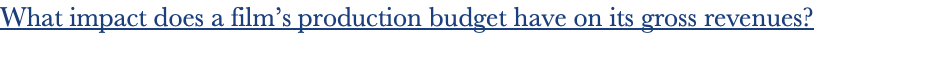

##### I plot a scatter diagram and noticed that the data is concentrated in the lower part of the graph (0-$150 million). I split the data into two parts to check if this strong correlation still holds. 


In [201]:
# I calculate the correlation of the two variables discussed. 
corr_p_d =movie_data['production_budget'].corr(movie_data['domestic_gross']).round(3)

/Users/nataliaedelson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Budget vs. Gross: Correlation =0.701')

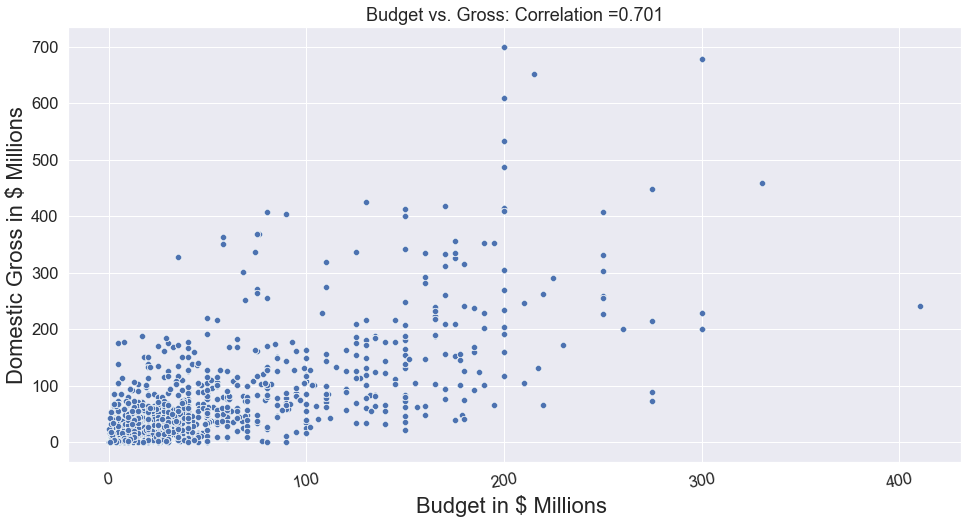

In [202]:
plt.figure(figsize=(16, 8))

sns.scatterplot(movie_data['production_budget'], movie_data['domestic_gross'])
plt.xticks(rotation = 10)
plt.xlabel('Budget in $ Millions ', fontsize=22)
plt.ylabel('Domestic Gross in $ Millions', fontsize=22)
plt.title('Budget vs. Gross: Correlation =' +str(Corr_p_d))

In [203]:
# Split the data 
split_prod_dome = movie_data[['production_budget','domestic_gross']]
split_prod_dome.head(20)

,production_budget,domestic_gross
0,60.0,45.0
1,60.0,45.0
2,60.0,45.0
3,60.0,45.0
4,60.0,45.0
5,60.0,45.0
6,60.0,45.0
7,60.0,45.0
8,60.0,45.0
9,60.0,45.0


In [204]:
# Create a data where production is less than $200 million dollars. 

pr_bu_0_20 = split_prod_dome.loc[split_prod_dome['production_budget'] <200]
pr_bu_0_20.head()


,production_budget,domestic_gross
0,60.0,45.0
1,60.0,45.0
2,60.0,45.0
3,60.0,45.0
4,60.0,45.0


In [210]:
# Calculate the correlation of the split data – less than $ 200 million dollars. 
corr_less_200 = pr_bu_0_20['production_budget'].corr(pr_bu_0_20['domestic_gross']).round(2)
corr_less_200

0.66

In [212]:
# Create a data where production is more than $200 million dollars.
pr_bu_20_up = split_prod_dome.loc[split_prod_dome['production_budget'] > 200]
pr_bu_0_20.head()

,production_budget,domestic_gross
0,60.0,45.0
1,60.0,45.0
2,60.0,45.0
3,60.0,45.0
4,60.0,45.0


In [213]:
# Calculate the correlation of the split data – less than $ 200 million dollars. 
# Corr_less_200 = Pr_Bu_0_20['production_budget'].corr(Pr_Bu_0_20['domestic_gross']).round(2)

corr_more_200 = pr_bu_20_up['production_budget'].corr(pr_bu_20_up['domestic_gross']).round(2)
corr_more_200

0.22

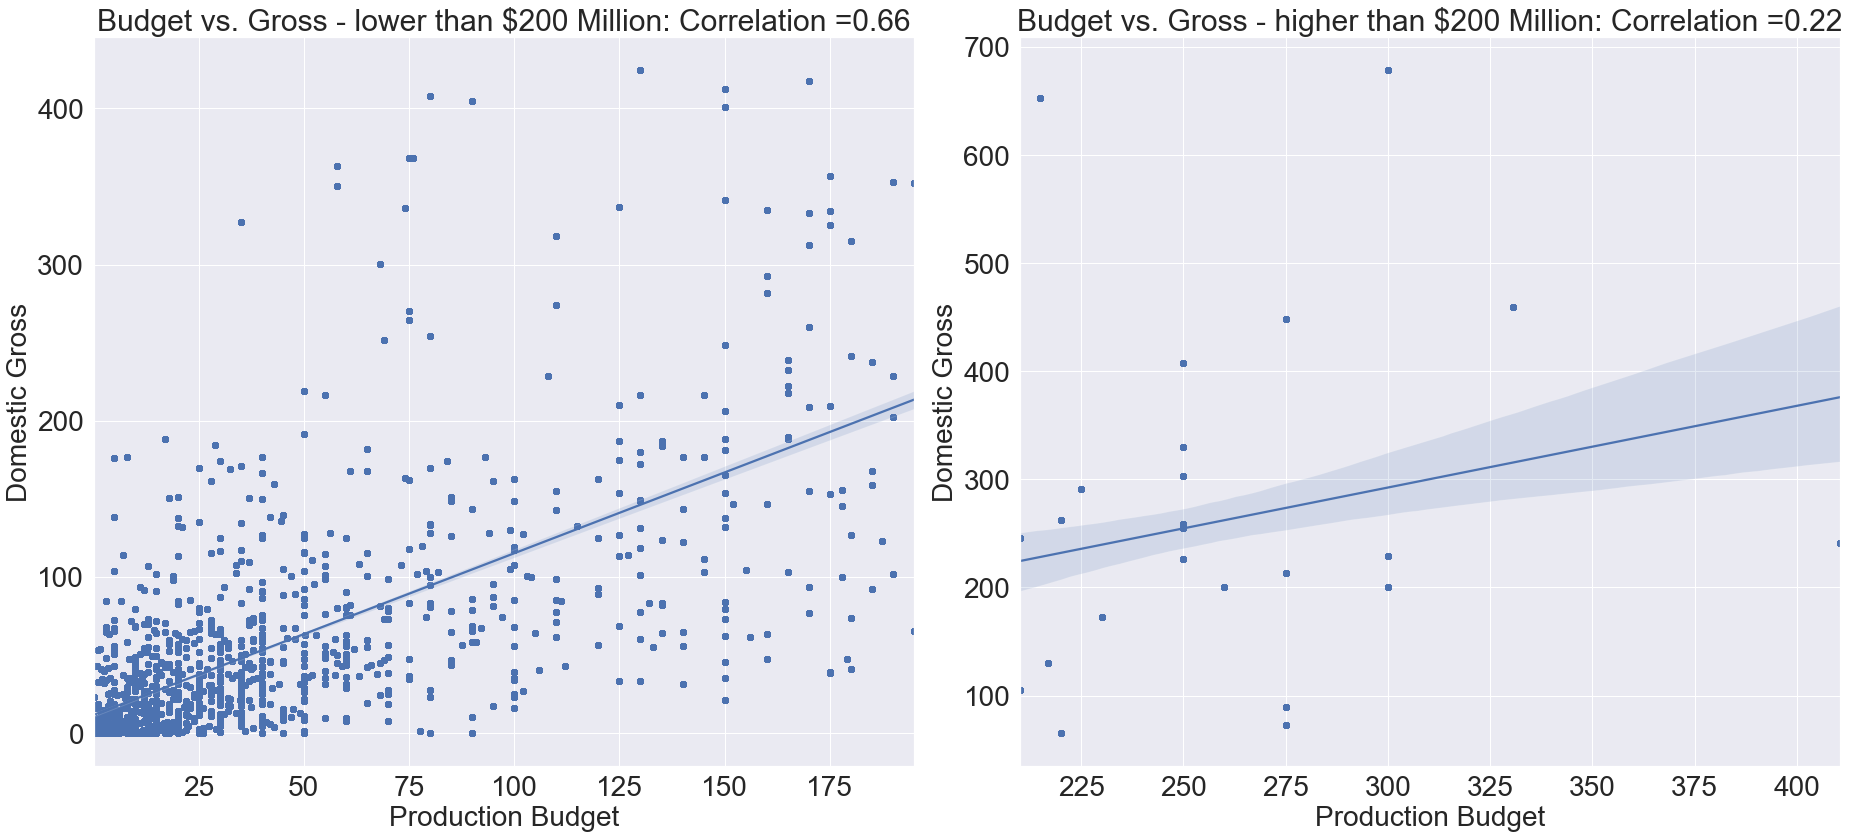

In [224]:
# Use regplot to compare the direction to which the line is headed. 

plt.figure(figsize=(26, 12))

plt.subplot(1,2,1) # two subplots 

sns.regplot(x='production_budget', y='domestic_gross', data = pr_bu_0_20)
plt.xticks(rotation = 0)
plt.title('Budget vs. Gross - lower than $200 Million: Correlation =' + str(corr_less_200),
          fontsize=30);
plt.xlabel('Production Budget', fontsize=28)
plt.ylabel('Domestic Gross', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=28)
#plt.tick_params(labelsize=18)

plt.subplot(1,2,2)
sns.regplot(x='production_budget', y='domestic_gross', data = pr_bu_20_up)
plt.xticks(rotation = 0)
plt.title('Budget vs. Gross - higher than $200 Million: Correlation =' +str(corr_more_200),
          fontsize=30);
plt.xlabel('Production Budget', fontsize=28)
plt.ylabel('Domestic Gross', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=28)

plt.tight_layout()

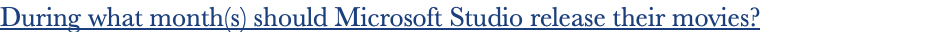

In [72]:
# Create a lamba function to extract the month into a new column.

def extract_month(movie_data, column):
    movie_data[column +"_month"] = movie_data[column].apply(lambda x: x.month)

In [73]:
# Create a new column called Release Date
release_date_month = extract_month(movie_data, 'release_date')

In [74]:
movie_data.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
2,Jordan Kerner,"producer,actor,executive",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
3,Pamela Ribon,"writer,producer,actress",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
4,Peyo,"writer,director,music_department",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4


In [75]:
# Group the data by release date month and then domestic gross columns.
group = movie_data.groupby(['release_date_month','domestic_gross' ])

In [76]:
group.head(5)

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
2,Jordan Kerner,"producer,actor,executive",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
3,Pamela Ribon,"writer,producer,actress",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
4,Peyo,"writer,director,music_department",tt2398241,Smurfs: The Lost Village,90.0,"Adventure,Animation,Comedy",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13680,Tamannaah Bhatia,actress,tt4849438,Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,GrtIndia,20.2,2017,2017-04-28,30.0,"$263,502,914",4
13681,Madhan Karky,"music_department,soundtrack,writer",tt4849438,Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,GrtIndia,20.2,2017,2017-04-28,30.0,"$263,502,914",4
13682,Anushka Shetty,actress,tt4849438,Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,GrtIndia,20.2,2017,2017-04-28,30.0,"$263,502,914",4
13683,Rana Daggubati,"actor,producer",tt4849438,Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,GrtIndia,20.2,2017,2017-04-28,30.0,"$263,502,914",4


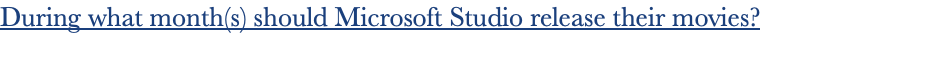

In [77]:
# Create variable called group_month groups the data by the release month date.

group_month = movie_data.groupby(['release_date_month']).mean()
group_month = pd.DataFrame.reset_index(group_month)

group_month 

,release_date_month,runtime_minutes,averagerating,domestic_gross,year,production_budget
0,1,104.453782,5.964811,40.373873,2013.992647,28.369013
1,2,106.878396,6.073868,62.766759,2014.023286,45.484476
2,3,104.421710,6.338905,52.883436,2013.506244,49.261960
3,4,107.172770,6.366197,45.318419,2013.692019,33.139859
4,5,108.201965,6.501638,86.434499,2013.704148,76.817686
5,6,107.612177,6.406839,100.714198,2014.031693,65.828249
6,7,106.962929,6.361121,79.213392,2013.927667,58.880063
7,8,104.306348,6.381049,46.446001,2013.426863,34.181417
8,9,105.955594,6.490009,33.528355,2013.678053,28.239637
9,10,108.624598,6.571383,33.056166,2013.260450,31.142283


In [194]:
# Build a function to create values, indices and palette in order to show the max value in a darker color. 

def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

s = group_month["domestic_gross"]



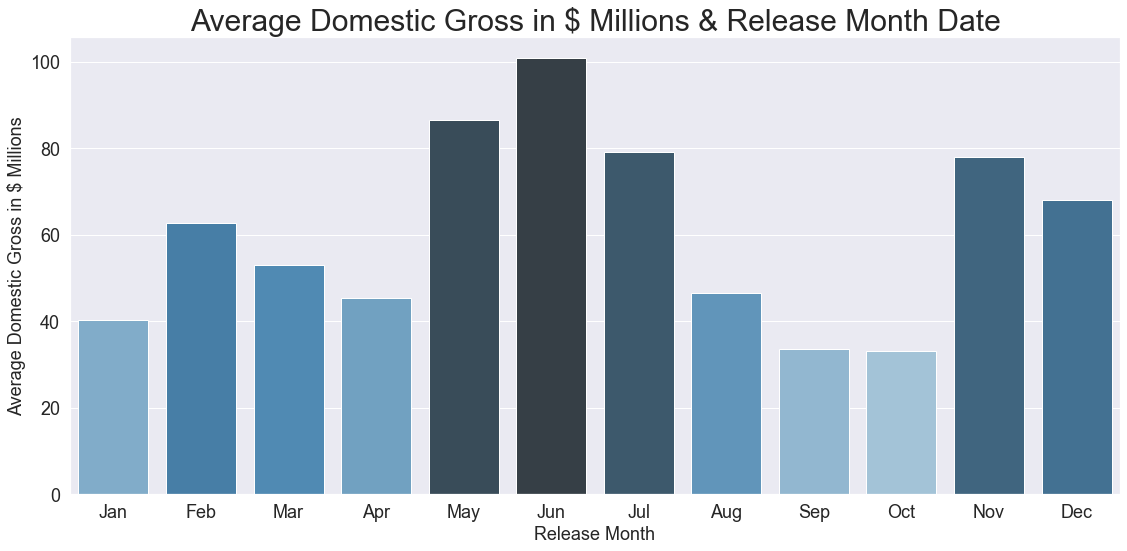

In [195]:
# Plot bar displaying the months of the release day and making the darkest color to be the highest.

fig, ax = plt.subplots(figsize=(16, 8))

# Create plot here with sns.

sns.barplot(x="release_date_month", y="domestic_gross", data=group_month, 
            palette=colors_from_values(s, "Blues_d"))

# Lable and define fontsize for main and axis titles.

plt.xlabel('Release Month', fontsize=18)
plt.ylabel('Average Domestic Gross in $ Millions', fontsize=18)
plt.title('Average Domestic Gross in $ Millions & Release Month Date', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=18)

# Set x-axis tick labels.

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug',
                    'Sep', 'Oct','Nov','Dec'])


plt.tight_layout()
plt.show()

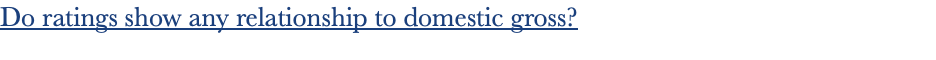

#### I compare the months to the gross domestic figured: July and November are the most profitable months to release a movie. 

In [80]:
# Check the rating data we are dealing with. 

movie_data['averagerating'].unique()

array([6. , 8.1, 7.1, 5.6, 7.4, 6.6, 6.3, 4.4, 6.7, 6.9, 7.9, 6.8, 7.2,
       7.3, 6.5, 6.2, 5.2, 6.1, 5.7, 7.8, 6.4, 7.6, 5.5, 5.4, 5.8, 3.8,
       5.3, 4.9, 4.6, 4.5, 4.2, 4.1, 5. , 7.7, 7. , 5.9, 8.4, 8. , 9.2,
       7.5, 8.8, 4.8, 8.3, 4.7, 8.2, 3.6, 5.1, 3.3, 2.4, 4.3, 3.9, 4. ,
       2.6, 8.5, 3.7, 3.2, 8.7, 8.6, 2.9, 1.6, 3.5, 1.7, 3.4, 3. , 2.1])

In [81]:
# Round the numbers to consolidate some of the data so that there will be 1-9 average rating.

movie_data['averagerating']= movie_data['averagerating'].round(decimals=0)


In [82]:
# Group the data by averagerating column.

group_rating = movie_data.groupby(['averagerating']).sum()
group_rating = pd.DataFrame.reset_index(group_rating)

group_rating

,averagerating,runtime_minutes,domestic_gross,year,production_budget,release_date_month
0,2.0,4348.0,942.451000,78480,402.573730,186
1,3.0,7354.0,5833.600000,171106,3276.000000,563
2,4.0,50065.0,24199.350000,1055278,18921.600000,3013
3,5.0,130213.0,49029.527373,2638212,48442.658984,8368
4,6.0,513485.0,236389.469060,9872608,215235.509440,32335
5,7.0,524274.0,294906.946943,9480578,222128.692857,34376
6,8.0,206912.0,198728.852980,3508470,112718.300000,14283
7,9.0,7889.0,4905.680800,130874,3763.000000,366


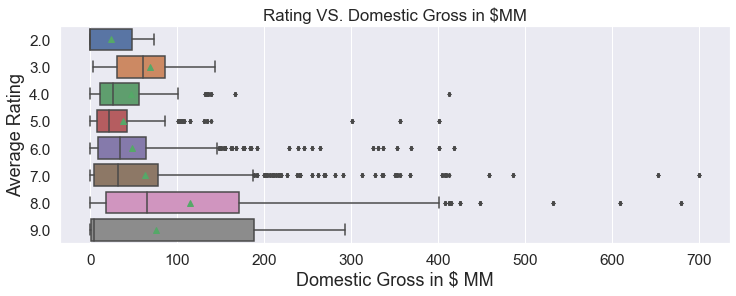

point biserial correlation r is 0.20562840168805802 with p = 1.1428744369266963e-127


In [83]:
# Plot subplot average rating to examine the difference in distribution.

from scipy import stats, linalg

fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(y = movie_data['averagerating'], x =movie_data['domestic_gross'],
            width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)

# Lable and define fontsize for main and axis titles
plt.xlabel('Domestic Gross in $ MM', fontsize=18)
plt.ylabel('Average Rating', fontsize=18)

plt.title('Rating VS. Domestic Gross in $MM')

plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(movie_data['averagerating'], movie_data['domestic_gross'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

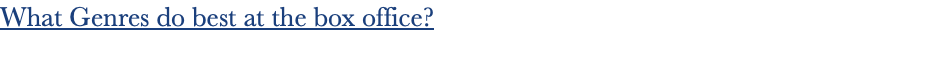

##### The genres column has data combined with different types of genres.  I would need to separate them into each individual row to allow each genre  be considered separately. 


In [84]:
# Check the different data present under the genres column – 
# Get the count value for each.

movie_data['genres'].value_counts()

Drama                         760
Adventure,Animation,Comedy    610
Comedy,Drama,Romance          504
Comedy,Drama                  493
Action,Adventure,Sci-Fi       440
                             ... 
Crime,Documentary,History       6
Documentary,Drama,Family        6
Documentary,History             5
Documentary,Drama,Sport         4
Documentary,News                4
Name: genres, Length: 215, dtype: int64

In [85]:
# Create a list of the genres in each entry by using lamb function. The lamba function loops through each row.  

movie_data['genres'] = movie_data['genres'].apply(lambda x: x.split(','))     

In [86]:
movie_data.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
2,Jordan Kerner,"producer,actor,executive",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
3,Pamela Ribon,"writer,producer,actress",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
4,Peyo,"writer,director,music_department",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4


In [87]:
# Use the explode() method to move each individual genre into a different row. 
# I check the count for each genre.
df_genres = movie_data.explode('genres') 

In [88]:
# Count how many movies are in each genre.

df_genres['genres'].value_counts()

Drama          7019
Comedy         4457
Action         3771
Adventure      3030
Thriller       2343
Crime          2026
Romance        1766
Horror         1437
Biography      1232
Mystery        1107
Sci-Fi         1102
Fantasy        1013
Animation       889
Family          726
History         423
Music           390
Sport           286
Documentary     262
War             126
Western          80
Musical          50
News             13
Name: genres, dtype: int64

In [89]:
df_genres.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,Adventure,6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,Animation,6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,Comedy,6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,Adventure,6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,Animation,6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4


In [90]:
top_20p_genres = df_genres.sort_values(by= 'domestic_gross', ascending = False).head(2675)
top_20p_genres

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,Sci-Fi,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12276,Kevin Feige,"producer,miscellaneous,production_manager",tt1825683,Black Panther,134.0,Action,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,Adventure,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,Action,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12282,Ryan Coogler,"director,writer,producer",tt1825683,Black Panther,134.0,Sci-Fi,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11738,Dan Lin,"producer,executive",tt1515091,Sherlock Holmes: A Game of Shadows,129.0,Adventure,8.0,WB,186.8,2011,2011-12-16,125.0,"$535,663,443",12
11738,Dan Lin,"producer,executive",tt1515091,Sherlock Holmes: A Game of Shadows,129.0,Action,8.0,WB,186.8,2011,2011-12-16,125.0,"$535,663,443",12
11737,Susan Downey,"miscellaneous,producer,executive",tt1515091,Sherlock Holmes: A Game of Shadows,129.0,Crime,8.0,WB,186.8,2011,2011-12-16,125.0,"$535,663,443",12
11737,Susan Downey,"miscellaneous,producer,executive",tt1515091,Sherlock Holmes: A Game of Shadows,129.0,Adventure,8.0,WB,186.8,2011,2011-12-16,125.0,"$535,663,443",12


In [91]:
Top_20p_genres['genres'].value_counts()

NameError: name 'Top_20p_genres' is not defined

##### I took top 20 % domestic gross performing movies out of 13,376 and check what genre appeared the most.

In [92]:
# Plot barplot to visualize the count of movies per genre

genres_Count = Top_20p_genres['genres'].value_counts()
genres_Count = genres_Count.reset_index().rename(columns={'index': 'genres', 'genres': 'count'})


plt.figure(figsize = (22,14))
sns.barplot(data = genres_Count, x = 'count', y = 'genres', palette = 'tab20b')
plt.title('Top 20 % Domestic Gross Movies VS. genres', fontsize = 28)
plt.xlabel('Movie Count', fontsize = 32)
plt.ylabel('genres', fontsize = 32);
plt.tick_params(labelsize=22)

NameError: name 'Top_20p_genres' is not defined

In [93]:
#df_genres = df_genres[['Geres','domestic_gross,'production_budget']]

In [94]:
df_genres.sort_values(by= 'domestic_gross', ascending = False).head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,Sci-Fi,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12276,Kevin Feige,"producer,miscellaneous,production_manager",tt1825683,Black Panther,134.0,Action,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,Adventure,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,Action,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2
12282,Ryan Coogler,"director,writer,producer",tt1825683,Black Panther,134.0,Sci-Fi,7.0,BV,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2


In [95]:
df_genres = df_genres[['genres', 'domestic_gross', 'production_budget']]

In [96]:
df_genres.head()

,genres,domestic_gross,production_budget
0,Adventure,45.0,60.0
0,Animation,45.0,60.0
0,Comedy,45.0,60.0
1,Adventure,45.0,60.0
1,Animation,45.0,60.0


In [97]:
Group_genres = df_genres.groupby(['genres']).mean().sort_values(by= 'domestic_gross', 
                                                                ascending = False)
Group_genres = pd.DataFrame.reset_index(Group_genres)
 

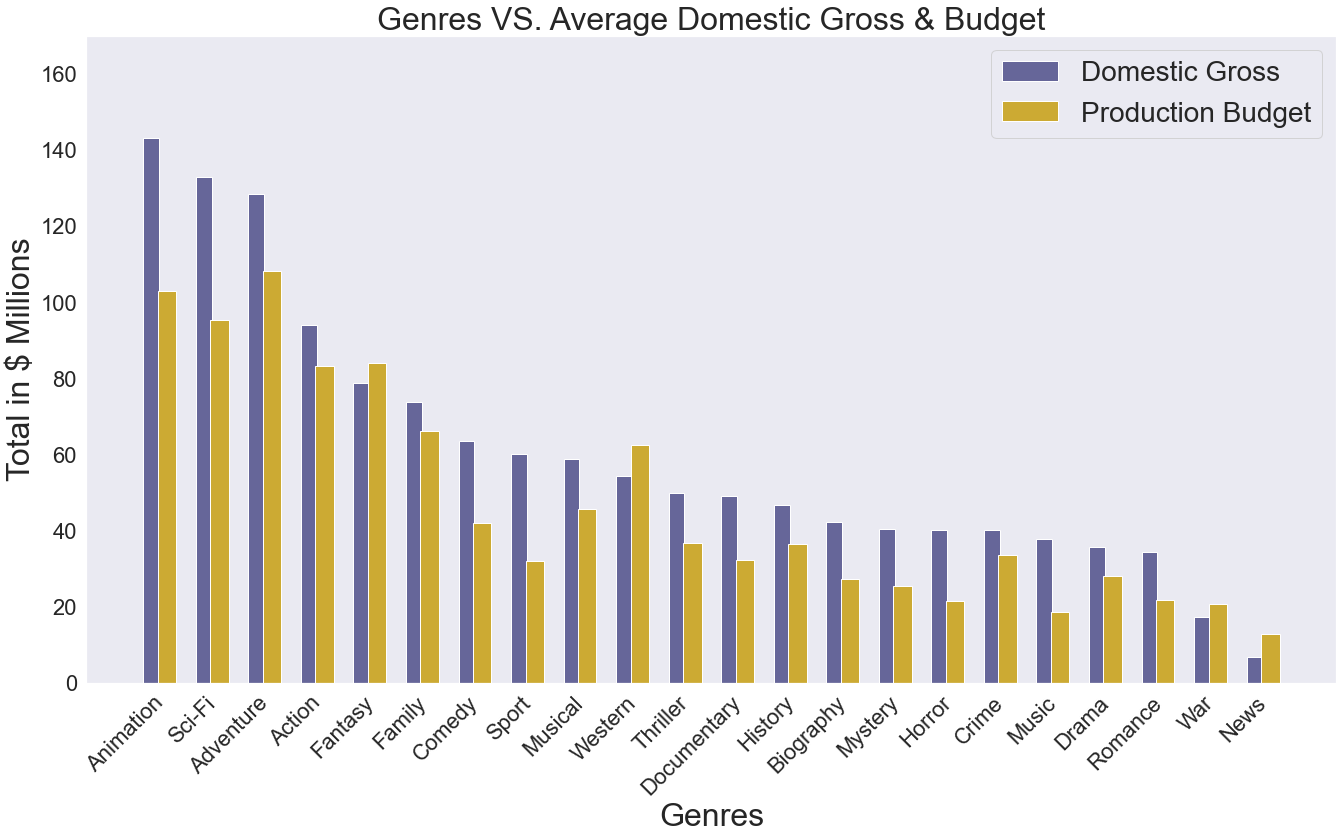

In [124]:
marks = Group_genres['genres'].index

x = np.arange(len(marks))  # the label locations

# set the plot, format, and labels


fig, ax = plt.subplots(figsize=(19,12))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2,
             Group_genres['domestic_gross'].values,
             width = 0.3,
             color = '#666699',
             label='Domestic Gross')
ax2 = ax.bar(x + bar_width / 2,
             Group_genres['production_budget'].values,
             width = 0.35,
             color = '#CCAA33',
             label='Production Budget')
#ax.yaxis.set_major_formatter(currency) #CCAA33
plt.ylim(0,170)

plt.tick_params(labelsize=22)

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(Group_genres['genres'].unique())


plt.setp(ax.get_xticklabels(), rotation=45, ha='right') 
# cite: https://pythonguides.com/matplotlib-x-axis-label/


ax.grid(color='#AF3150', linestyle='-', linewidth=0.1)
ax.set_xlabel('Genres',fontsize = 32)
ax.set_ylabel('Total in $ Millions', fontsize = 32)
# Add title and legends 

ax.set_title('Genres VS. Average Domestic Gross & Budget', fontsize = 32)
ax.legend(loc="upper right", frameon=True, fontsize=28)
# format the layout and display the visualization
fig.tight_layout()
plt.show()

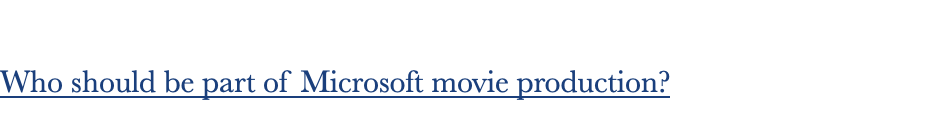

##### I examine closely the cast and crew to determine whose names appear the most in the top 20 % gross movies.  

In [162]:
top_20p_persons = movie_data.sort_values(by= 'domestic_gross', ascending = False).head(2675)

top_20p_persons.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month,Movie_studio
12275,Michael B. Jordan,"actor,producer,director",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12281,Danai Gurira,actress,tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12280,Chadwick Boseman,"actor,producer,writer",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12279,Lupita Nyong'o,"actress,producer,miscellaneous",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)


In [163]:
top_20p_persons['full_name'] = Top_20p_persons['name'].str.replace(' ','_')

top_20p_persons.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month,Movie_studio,full_name
12275,Michael B. Jordan,"actor,producer,director",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney),Michael_B._Jordan
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney),Ludwig_Göransson
12281,Danai Gurira,actress,tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney),Danai_Gurira
12280,Chadwick Boseman,"actor,producer,writer",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney),Chadwick_Boseman
12279,Lupita Nyong'o,"actress,producer,miscellaneous",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney),Lupita_Nyong'o


In [164]:
# Group the data by full name column.

group_persons = top_20p_persons.groupby(['full_name']).sum()

persons = pd.DataFrame.reset_index(group_persons)

persons = persons.sort_values(by= 'domestic_gross', ascending = False).head(30)

persons

,full_name,runtime_minutes,averagerating,domestic_gross,year,production_budget,release_date_month
1567,Stan_Lee,1712.0,95.0,4358.0,26196,2603.6,79
693,Jack_Kirby,1361.0,74.0,3793.2,20145,2138.6,47
1436,Robert_Downey_Jr.,1048.0,59.0,2888.8,16110,1615.6,54
791,Jennifer_Lawrence,1083.0,59.0,2035.5,16106,894.0,70
281,Chris_Hemsworth,774.0,43.0,1995.6,12086,1280.6,42
280,Chris_Evans,697.0,38.0,1982.4,10074,1190.6,25
482,Dwayne_Johnson,1054.0,60.0,1951.1,18132,1184.0,51
312,Christopher_Markus,781.0,44.0,1834.2,12082,1165.0,43
1578,Stephen_McFeely,781.0,44.0,1834.2,12082,1165.0,43
1137,Mark_Ruffalo,673.0,38.0,1698.6,10073,965.6,27


In [165]:
# Create a string for the word cloud.
actor_long_string = top_20p_persons['full_name'].tolist()
actor_long_string = " ".join(actor_long_string)


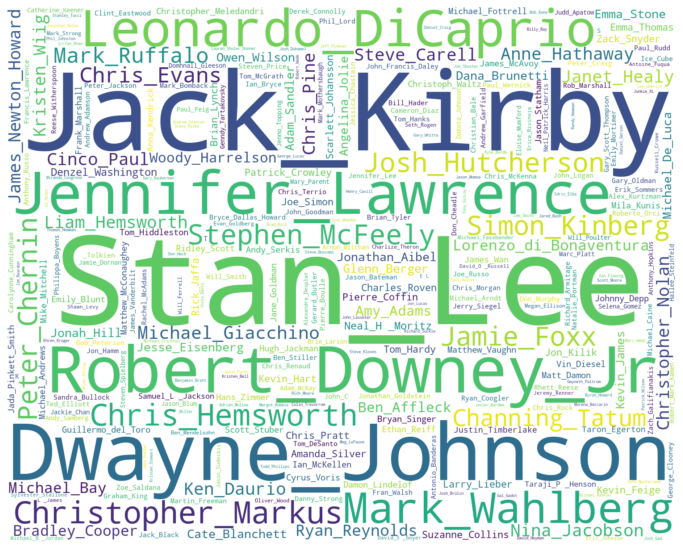

In [166]:
# Create a word cloud 
wc = WordCloud(width=1500, height=1200, stopwords=["J", "R"],mode ='RGBA', 
               background_color='white', max_words=300).generate(actor_long_string)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [167]:
top_30_persons = top_20p_persons.head(30)

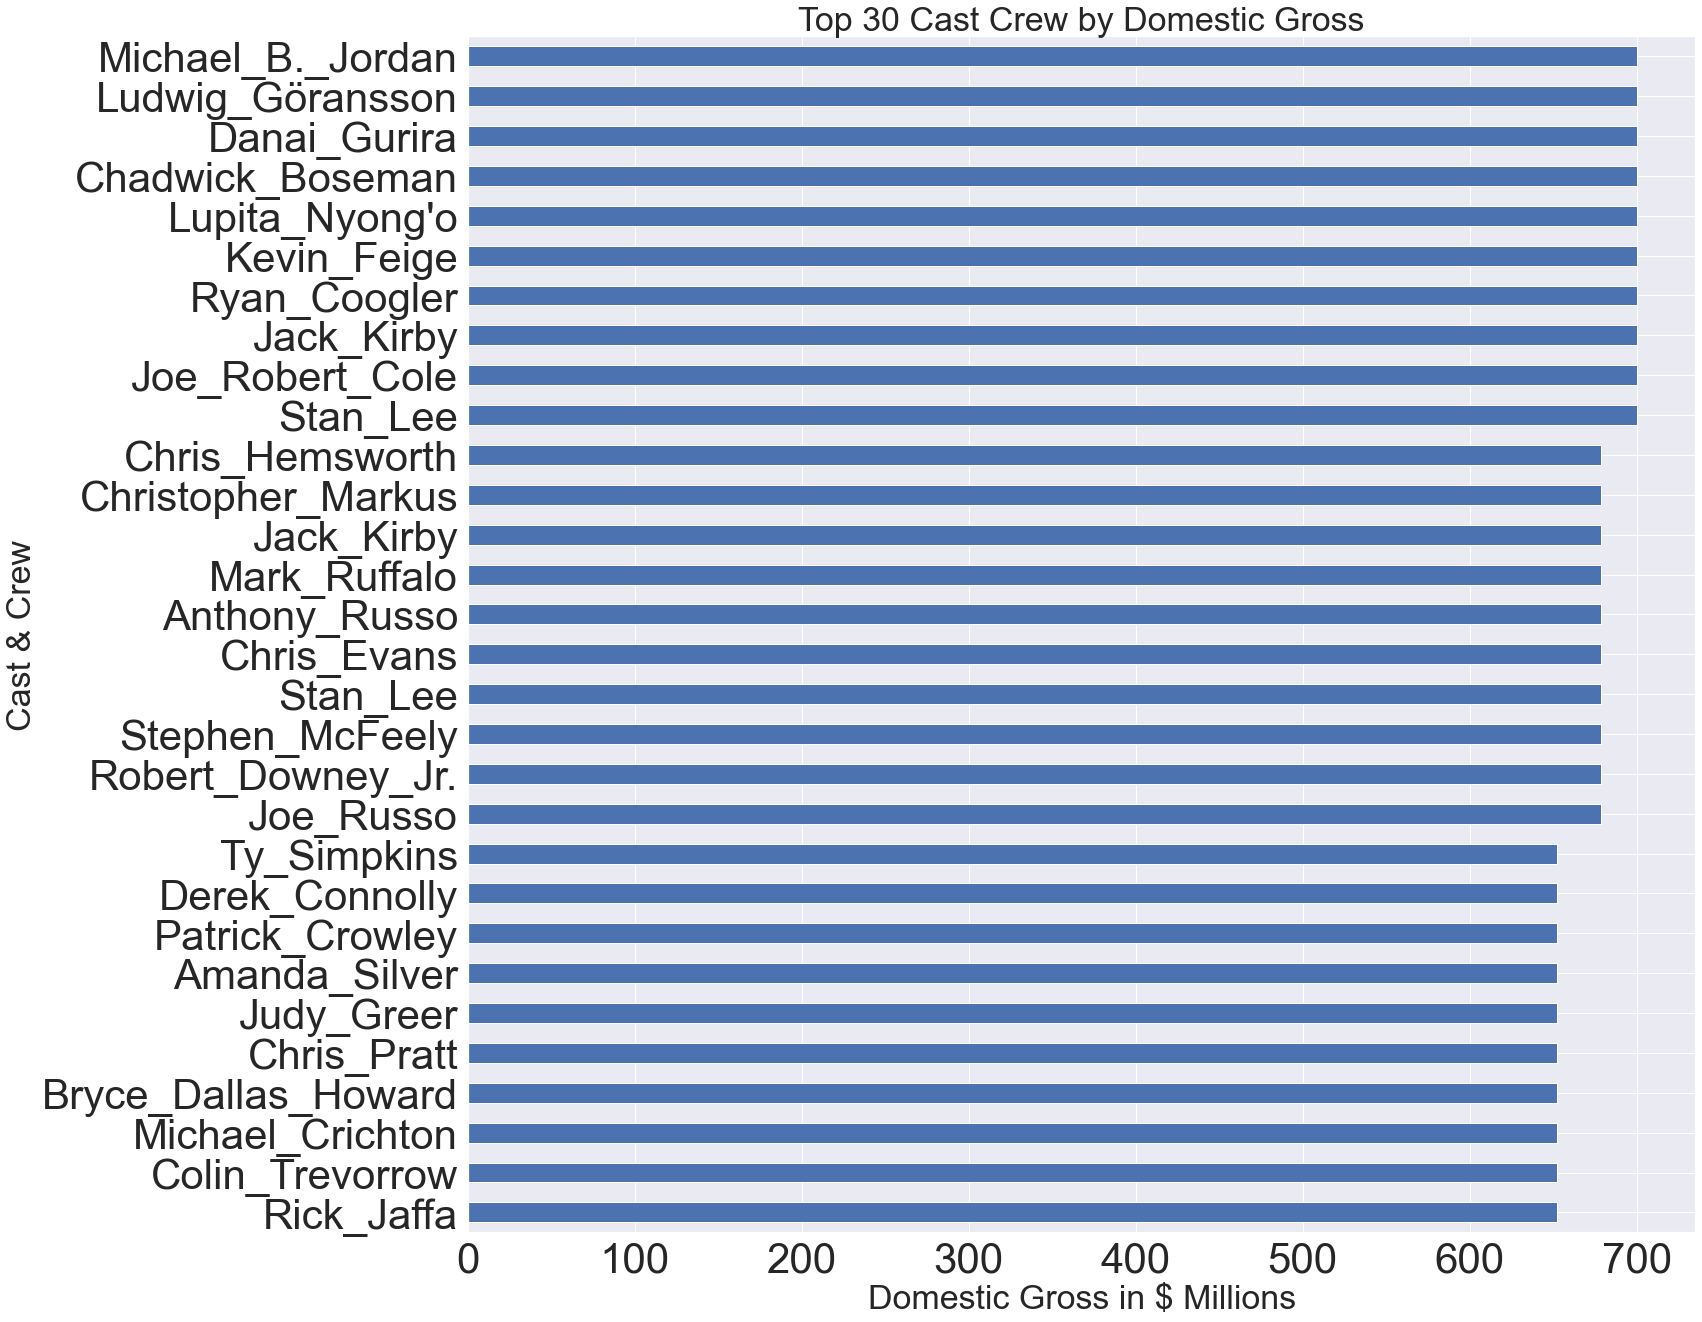

In [169]:
# Plot a barplot to check crew and cast names and their respective domestic gross.

sns.set_style('whitegrid')
sns.set_color_codes("pastel")
sns.set(font_scale=5)

fig, ax = plt.subplots(1,1, figsize=(22,22))

# Sort values

top_30_persons.reset_index().sort_values('domestic_gross', 
                                         ascending=True).plot('full_name','domestic_gross', 
                                                              kind='barh', ax=ax)

# Set label

ax.set_ylabel('Cast & Crew',fontdict= { 'fontsize': 34})
ax.set_xlabel('Domestic Gross in $ Millions', fontdict= { 'fontsize': 34})
ax.set_title('Top 30 Cast Crew by Domestic Gross',fontdict= { 'fontsize': 34})
plt.tick_params(labelsize=42);
ax.legend_.remove()

In [173]:
# Check top 20 people
top_20 = top_20p_persons[["name", "domestic_gross"]].head(20)

In [174]:
top_20 = top_20.set_index('name', inplace=True)

In [175]:
top_20

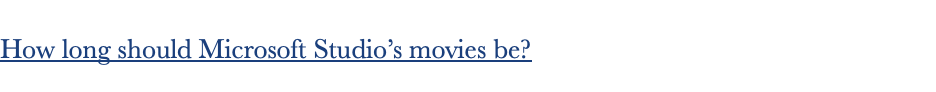

<AxesSubplot:xlabel='runtime_minutes', ylabel='domestic_gross'>

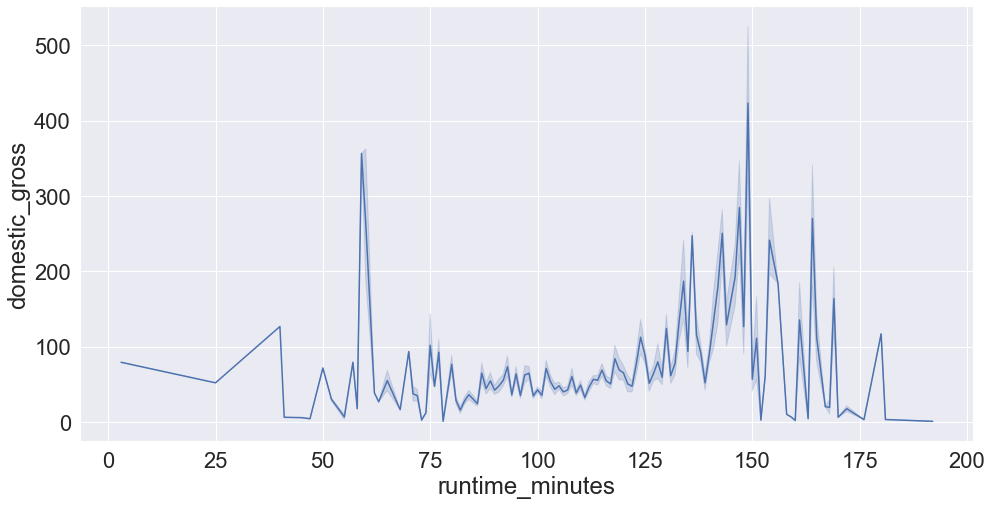

In [176]:
# Plot line graph to check domestic gross against the length of time in minutes.
sns.set_style('whitegrid')
sns.set_color_codes("pastel")
sns.set(font_scale=2)

fig, ax = plt.subplots(1,1, figsize=(16,8))

sns.lineplot(data=movie_data, x="runtime_minutes", y="domestic_gross")


In [177]:
# Extract top 20% performing movies. 

Top_20p_minutes = movie_data.sort_values(by= 'domestic_gross', ascending = False).head(2675)
Top_20p_minutes.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month,Movie_studio
12275,Michael B. Jordan,"actor,producer,director",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12281,Danai Gurira,actress,tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12280,Chadwick Boseman,"actor,producer,writer",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12279,Lupita Nyong'o,"actress,producer,miscellaneous",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)


<Figure size 1800x864 with 0 Axes>

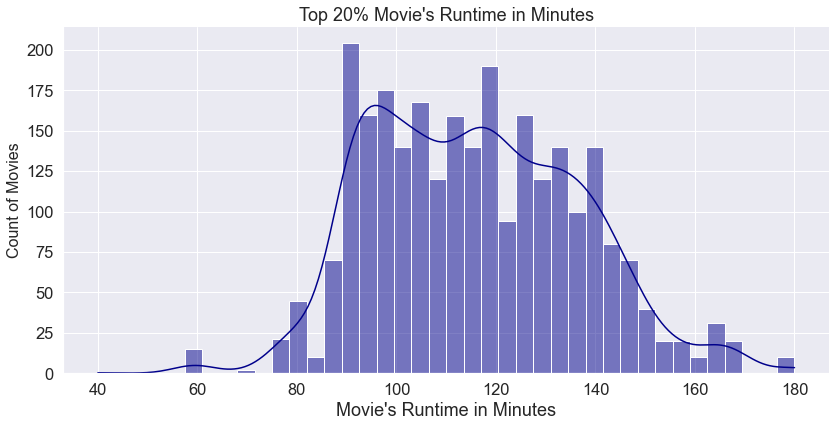

In [178]:
# visualize the distribution of movie's scores.

plt.figure(figsize = (25,12))
sns.set(font_scale=1.5)
sns.displot(Top_20p_minutes['runtime_minutes'], kde = True, height = 6, 
            aspect = 2, color="darkblue", bins = 40)
plt.title("Top 20% Movie's Runtime in Minutes", fontsize = 18)
plt.xlabel("Movie's Runtime in Minutes", fontsize = 18)
plt.ylabel('Count of Movies', fontsize = 16);

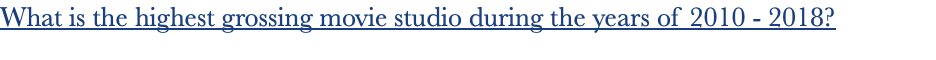

In [179]:
# Extracting top 30 performaing movies. 

top_30_movies = movie_data.sort_values(by= 'domestic_gross', ascending = False)

top_30_movies.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month,Movie_studio
12275,Michael B. Jordan,"actor,producer,director",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12278,Ludwig Göransson,"composer,soundtrack,music_department",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12281,Danai Gurira,actress,tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12280,Chadwick Boseman,"actor,producer,writer",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)
12279,Lupita Nyong'o,"actress,producer,miscellaneous",tt1825683,Black Panther,134.0,"[Action, Adventure, Sci-Fi]",7.0,Walt Disney,700.1,2018,2018-02-16,200.0,"$1,348,258,224",2,Black Panther(Walt Disney)


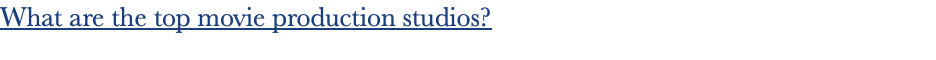

In [180]:
# Sum the domestic gross data per each studio.

studio_Gorss = movie_data.groupby('studio', as_index = False)['domestic_gross'].sum().sort_values(by = 'domestic_gross', 
                                                                                                  ascending = False).head(30)

In [181]:
# Rename the studio name to make it clearer.

studio_Gorss['studio'] = studio_Gorss['studio'].replace(['BV'],'Walt Disney')

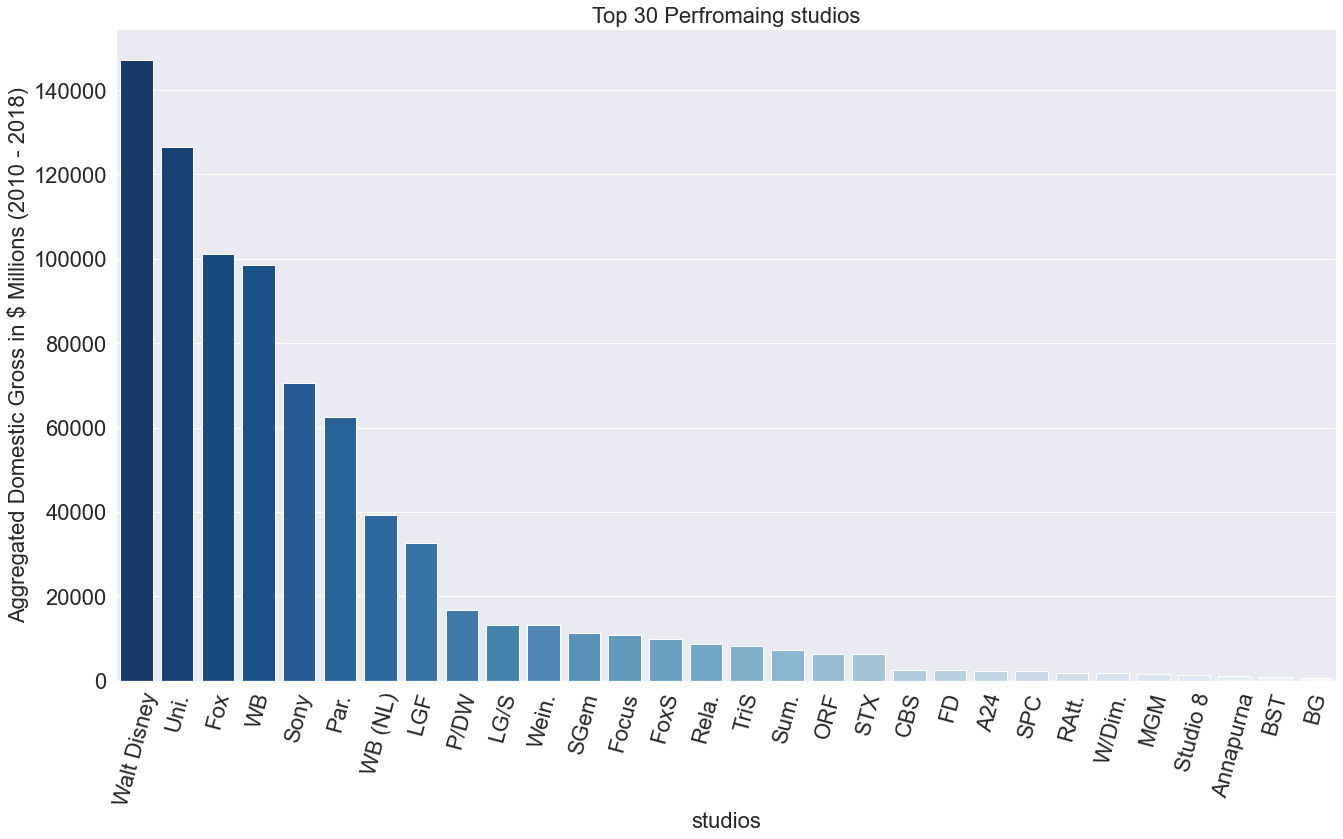

In [182]:
# Plot bar graph to show top studios.

fig, ax = plt.subplots(figsize=(19, 12))
sns.set(font_scale=1.5)
plt.xticks(rotation = 75)
sns.barplot(data = studio_Gorss[studio_Gorss['domestic_gross'] > 0], 
            x = 'studio', y = 'domestic_gross', palette = 'Blues_r')
plt.title('Top 30 Perfromaing studios', fontsize = 22)
plt.xlabel('studios', fontsize = 22)
plt.ylabel('Aggregated Domestic Gross in $ Millions (2010 - 2018)', fontsize = 22);
plt.tick_params(labelsize=22)
plt.tight_layout()

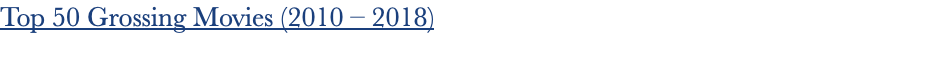

#### I show the top 30 domestic gross movies with its respective studios. The second bar represents the production budget for the movie 

In [183]:
# Change the name from BV to Walt Disney for clarification. 

movie_data['studio'] = movie_data['studio'].replace(['BV'],'Walt Disney')

In [184]:
# Create a new column to capture the movies name and its studio production. 
movie_data['Movie_studio'] = movie_data['title'] + '(' +movie_data['studio']+')'

In [185]:
movie_data.head()

,name,profession,movie_id,title,runtime_minutes,genres,averagerating,studio,domestic_gross,year,release_date,production_budget,worldwide_gross,release_date_month,Movie_studio
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4,Smurfs: The Lost Village(Sony)
1,Kelly Asbury,"art_department,animation_department,director",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4,Smurfs: The Lost Village(Sony)
2,Jordan Kerner,"producer,actor,executive",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4,Smurfs: The Lost Village(Sony)
3,Pamela Ribon,"writer,producer,actress",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4,Smurfs: The Lost Village(Sony)
4,Peyo,"writer,director,music_department",tt2398241,Smurfs: The Lost Village,90.0,"[Adventure, Animation, Comedy]",6.0,Sony,45.0,2017,2017-04-07,60.0,"$197,578,586",4,Smurfs: The Lost Village(Sony)


In [186]:
# Sorting out movies by domestic_gross.
top_30_movies = movie_data[['domestic_gross', 'production_budget',
                            'Movie_studio']].sort_values(by= 'domestic_gross', 
                                                         ascending = False)

In [187]:
top_30_movies.head()

,domestic_gross,production_budget,Movie_studio
12275,700.1,200.0,Black Panther(Walt Disney)
12278,700.1,200.0,Black Panther(Walt Disney)
12281,700.1,200.0,Black Panther(Walt Disney)
12280,700.1,200.0,Black Panther(Walt Disney)
12279,700.1,200.0,Black Panther(Walt Disney)


In [188]:
# Each movie is shown in multiple rows because of the extrapolation of the different 
# genres therefore we need to drop the duplicates. 

top_30_movies = top_30_movies.drop_duplicates()

In [189]:
top_30_movies= top_30_movies.head(30)

In [190]:
# Create a dataframe with top 30 movies and its production budget
top_30_movies_Prod = top_30_movies[['production_budget', 'Movie_studio']]

In [191]:
# Create a dataframe with top 30 movies and its production budget
top_30_movies_Dome = top_30_movies[['domestic_gross', 'Movie_studio']]

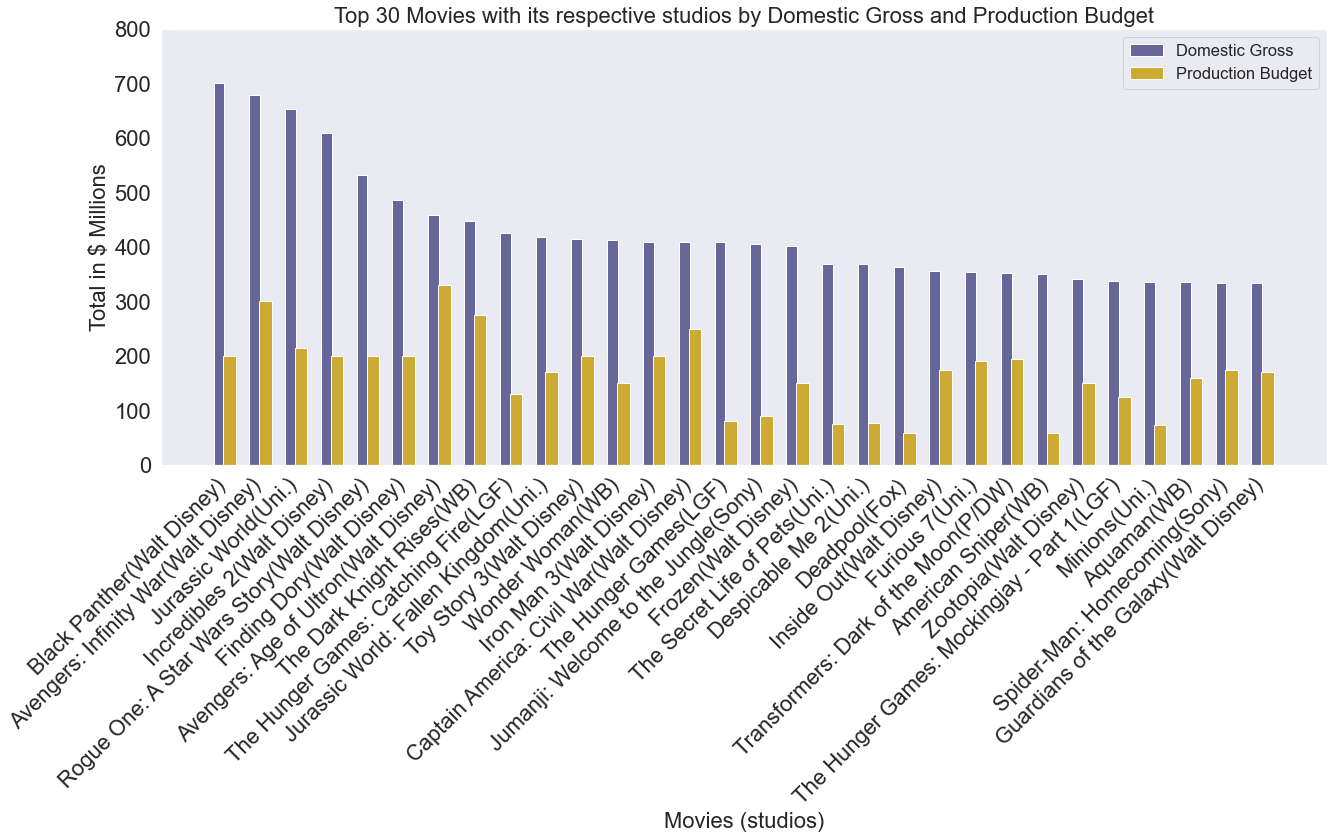

In [192]:
labels = top_30_movies['Movie_studio'].index

x = np.arange(len(labels))  # the label locations

# set the plot, format, and labels


fig, ax = plt.subplots(figsize=(19,12))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2,
             top_30_movies['domestic_gross'].values,
             width = 0.3,
             color = '#666699',
             label='Domestic Gross')
ax2 = ax.bar(x + bar_width / 2,
             top_30_movies['production_budget'].values,
             width = 0.35,
             color = '#CCAA33',
             label='Production Budget')
#ax.yaxis.set_major_formatter(currency) #CCAA33
plt.ylim(0,800)

plt.tick_params(labelsize=22)

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(top_30_movies['Movie_studio'].unique())


plt.setp(ax.get_xticklabels(), rotation=45, ha='right') 
# cite: https://pythonguides.com/matplotlib-x-axis-label/


ax.grid(color='#AF3150', linestyle='-', linewidth=0.1)
ax.set_xlabel('Movies (studios)',fontsize = 22)
ax.set_ylabel('Total in $ Millions', fontsize = 22)
# Add title and legends 

ax.set_title('Top 30 Movies with its respective studios by Domestic Gross and Production Budget',
             fontsize = 22)
ax.legend()
# format the layout and display the visualization
fig.tight_layout()
plt.show()

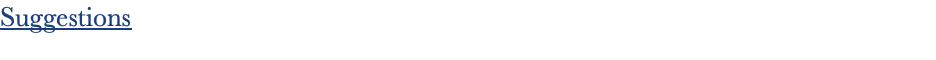

1.	**Budget**:   Budgets as low as 15 to 35 million dollars show an increase in the movie’s gross domestic, but a budget above 200 million dollars does not show the same rate of return. Do not exceed 200 million dollars.

2.	**Release Month**: Aim to release the movie in June or May; if not, then in July, November, and December. June and May bring twice as much domestic gross as the other months.

3.	**Genres**: Prioritize the production of Adventure, Action, Comedy, and Sci Fi movies, as these genres are the top performers.
  
4.	**Cast and Crew**: Hire from the top performing cast and crew to increase chances for success. Certain names are associated with the most successful movies.

5.	  **Movie Length**: Produce movies that would range from 90 minutes to 140 minutes. Movies within this length of time are the most profitable.

6.	**Studios**:  Partner with established studios to produce movies, at least for the first year. This is a long-term investment that can lead to fruitful returns and greater independence in the future.


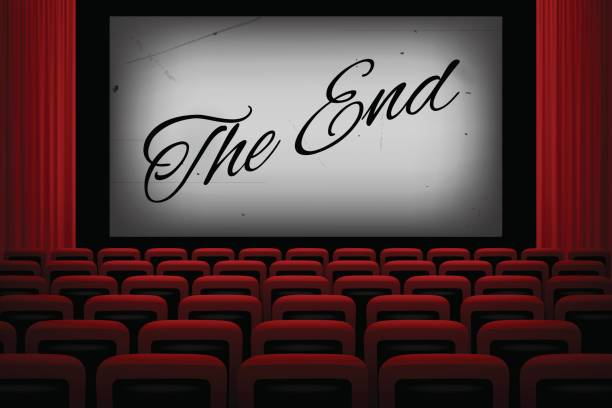